<a href="https://colab.research.google.com/github/shuvo1165/Machine-Learning/blob/main/Paddy_leaf_disease_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Kaggle/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Kaggle/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 911 images belonging to 3 classes.
Found 164 images belonging to 3 classes.


In [16]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [17]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 173056)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

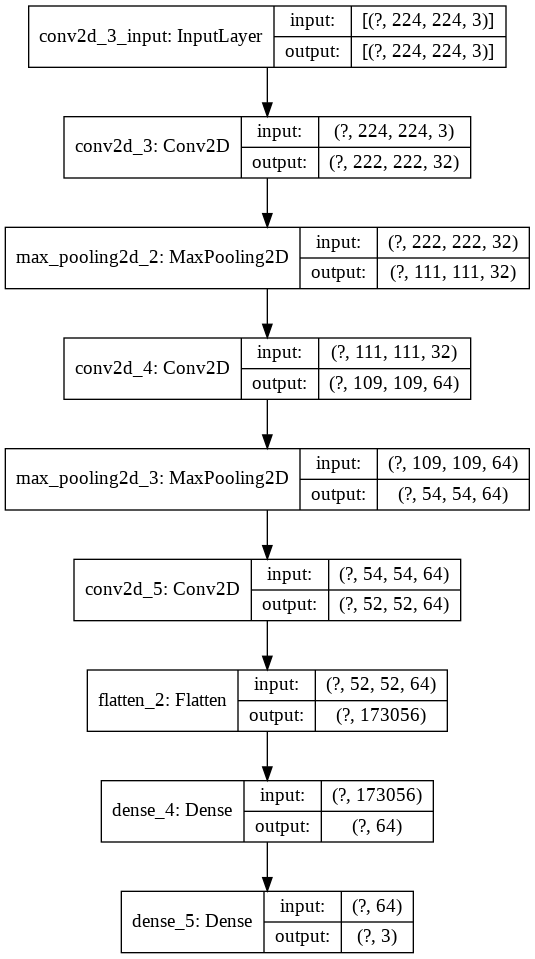

In [24]:
from tensorflow import keras
keras.utils.plot_model(model,"Paddy_leaf.png",show_shapes=True)

In [19]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10

)

Epoch 1/10
29/29 [==============================] - 566s 20s/step - loss: 1.5689 - accuracy: 0.3963 - val_loss: 1.0949 - val_accuracy: 0.3293
Epoch 2/10
29/29 [==============================] - 35s 1s/step - loss: 1.0406 - accuracy: 0.4588 - val_loss: 1.0178 - val_accuracy: 0.4085
Epoch 3/10
29/29 [==============================] - 33s 1s/step - loss: 0.9225 - accuracy: 0.4962 - val_loss: 0.9442 - val_accuracy: 0.5183
Epoch 4/10
29/29 [==============================] - 32s 1s/step - loss: 0.8404 - accuracy: 0.6092 - val_loss: 0.8940 - val_accuracy: 0.5549
Epoch 5/10
29/29 [==============================] - 32s 1s/step - loss: 0.7446 - accuracy: 0.6465 - val_loss: 0.9131 - val_accuracy: 0.5610
Epoch 6/10
29/29 [==============================] - 32s 1s/step - loss: 0.6681 - accuracy: 0.7003 - val_loss: 1.0078 - val_accuracy: 0.6463
Epoch 7/10
29/29 [==============================] - 31s 1s/step - loss: 0.5311 - accuracy: 0.7640 - val_loss: 0.7907 - val_accuracy: 0.7134
Epoch 8/10
29/29 [

In [28]:
test_accu = model.evaluate(test_set)

6/6 [==============================] - 3s 579ms/step - loss: 0.5727 - accuracy: 0.8110


In [29]:
print('Test accuracy:',test_accu)

Test accuracy: [0.572704553604126, 0.8109756112098694]


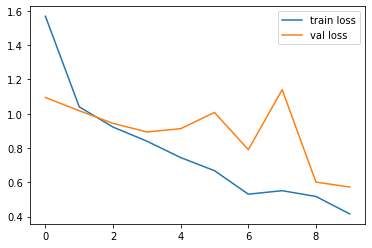

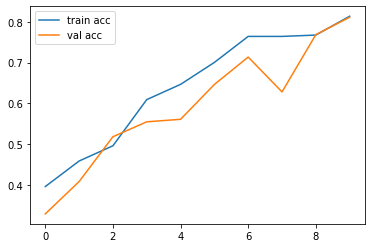

<Figure size 432x288 with 0 Axes>

In [26]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')